#### ***1/-Loading the Dataset***

In [1]:
import os
import pandas as pd

# Path to your dataset
data_dir = "C:\ArabTextClassification\dataset\TextClasses"  # replace with your actual folder name
data = []

# Loop through each class folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read().strip()
                    if text:  # Skip empty files
                        data.append((text, class_name))
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Create a DataFrame
df = pd.DataFrame(data, columns=["text", "label"])

# Show dataset info
print("Dataset loaded:")
print("Total samples:", len(df))
print("Labels:", df['label'].value_counts())
df.head()


Dataset loaded:
Total samples: 45500
Labels: label
Culture     6500
Finance     6500
Medical     6500
Politics    6500
Religion    6500
Sports      6500
Tech        6500
Name: count, dtype: int64


,text,label
0,ينظم معهد الشارقة للفنون معرضاً فنياً تحت عنوا...,Culture
1,تقيم الفنانة ليتا كابيلوت معرضاً في مطلع العام...,Culture
2,تتواصل الليلة مسيرة التحدّي والمتعة والإثارة ض...,Culture
3,عقدت ظهر أمس الأول في قصر الثقافة في الشارقة ا...,Culture
4,اختارت صحيفة «التايمز» جورج أورويل ليحل في الم...,Culture


The dataset contains 45,500 samples across multiple classes(7),and every class contains 6500 file.


#### ***2/-Exploratory Data Analysis (EDA)***

##### **>import the libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### **>Visualize class distribution.**

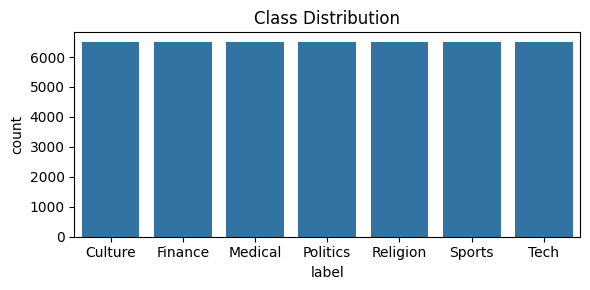

In [3]:

plt.figure(figsize=(6,3))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the plot, we can observe that the dataset is balanced, with each class containing an equal number of samples (approximately 6,500 samples per class). This balance reduces the risk of bias towards any particular class.


##### **>Text length analysis**

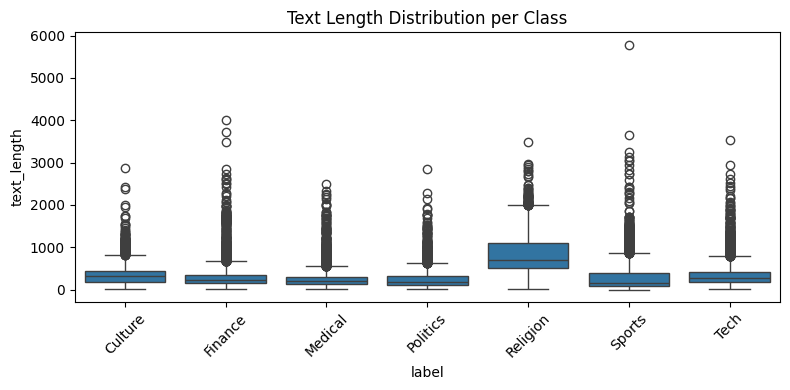

In [4]:

df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This box plot shows how long the texts are in each class.
 The line in the box is the middle length (median). 
 The box shows most of the texts, and the dots are texts that are much longer or shorter than usual(outliers).


##### **>Average article length (in words and characters)**

In [18]:
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().apply(len)

# Overall averages
df.groupby('label')[['char_count', 'word_count']].mean()


,char_count,word_count
label,,
Culture,2107.546462,348.219538
Finance,1708.206000,296.175692
Medical,1543.505077,246.736462
Politics,1434.378308,237.737077
Religion,4674.868308,809.917231
Sports,1742.242000,295.247231
Tech,2159.999846,350.638462


 ##### **>Find longest and shortest article examples**

In [22]:
# Shortest
df.loc[df['char_count'].idxmin()]

text            تجربة أفاق
label               Sports
text_length              2
unique_words             2
char_count              10
word_count               2
Name: 34916, dtype: object

In [ ]:
# Longest
df.loc[df['char_count'].idxmax()]


text            تلتقي إسبانيا مع إيطاليا مساء اليوم في المبارا...
label                                                      Sports
text_length                                                  5786
unique_words                                                 2379
char_count                                                  33339
word_count                                                   5786
Name: 35850, dtype: object

#### ***3/-Build First Model (baseline with no preprocessing.)***

In [23]:
#required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
